# Etapes a faire avant traiter les Analyses

### 1. Importation de tous les bibliotheques

In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # AFD
from sklearn.model_selection import train_test_split  # Division des données
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Évaluation des performances
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

### 2. Chargement des donnees

In [165]:
# Charger les données
df = pd.read_csv('data_cleaned.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     45 non-null     object 
 1   PIB_total                                   45 non-null     float64
 2   la concentration moyenne annuelle en PM2,5  45 non-null     float64
 3   PIB_par_habitant                            45 non-null     float64
 4   Depenses_en_education_PIB                   45 non-null     float64
 5   Esperance_de_vie                            45 non-null     float64
 6   Depenses_en_sante_par_habitant              45 non-null     float64
 7   Taux_mortalite_infantile                    45 non-null     float64
 8   Acces_electricite                           45 non-null     float64
 9   Acces_eau_potable                           45 non-null     float64
 10  Taux_pauvrete   

### 3. Choisir les colonnes

In [167]:
# Sélectionner les colonnes numériques 
colonnes_numeriques = [
    'PIB_par_habitant', 'Depenses_en_education_PIB', 
    'Esperance_de_vie', 'Depenses_en_sante_par_habitant', 
    'Taux_mortalite_infantile', 'Acces_electricite', 'Acces_eau_potable', 
    'Taux_pauvrete', 'Taux_chomage', 'Acces_internet', 
    'Ratio_dette_PIB', 'Investissements_directs_etrangers', 
    'Emplois_agriculture'
]

### 4. Standardisation des donnees

In [168]:
# Préparer les données pour l'ACP
X = df[colonnes_numeriques]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-7.60467304e-01,  5.52878374e-01, -2.13789864e+00,
        -6.76993075e-01,  2.81152616e+00,  3.80125257e-02,
        -2.09426058e+00, -1.97154738e-16,  1.06511265e+00,
        -2.05902509e+00, -4.82566446e-16, -1.30665978e-02,
         1.25844662e+00],
       [-5.11922607e-01, -9.87262216e-01, -3.15653742e-01,
        -2.23804654e-01, -5.05764011e-01,  4.05703779e-01,
         7.60257182e-01, -7.16666988e-01,  1.16557885e+00,
         3.08398478e-01, -3.73492931e-01,  1.17757947e-02,
         1.60688529e+00],
       [-5.14486848e-01,  1.60634042e-01, -1.32284370e+00,
        -5.20670620e-01,  4.82168530e-02,  4.05703779e-01,
         3.20210509e-01, -1.97154738e-16,  1.09615030e-01,
         6.38094917e-01, -1.77292665e+00,  5.69502846e-02,
         7.31985099e-01],
       [ 8.15769733e-01, -1.09537289e+00,  1.01353323e+00,
         3.07791817e-01, -7.95944463e-01,  4.05703779e-01,
         7.57599596e-01, -1.97154738e-16, -1.06028173e+00,
         1.25211751e+00,  1.26315704e

**=>** Les données sont maintenant sur une échelle comparable, permettant une analyse significative.

### 5. Calcul de la matrice de correlation

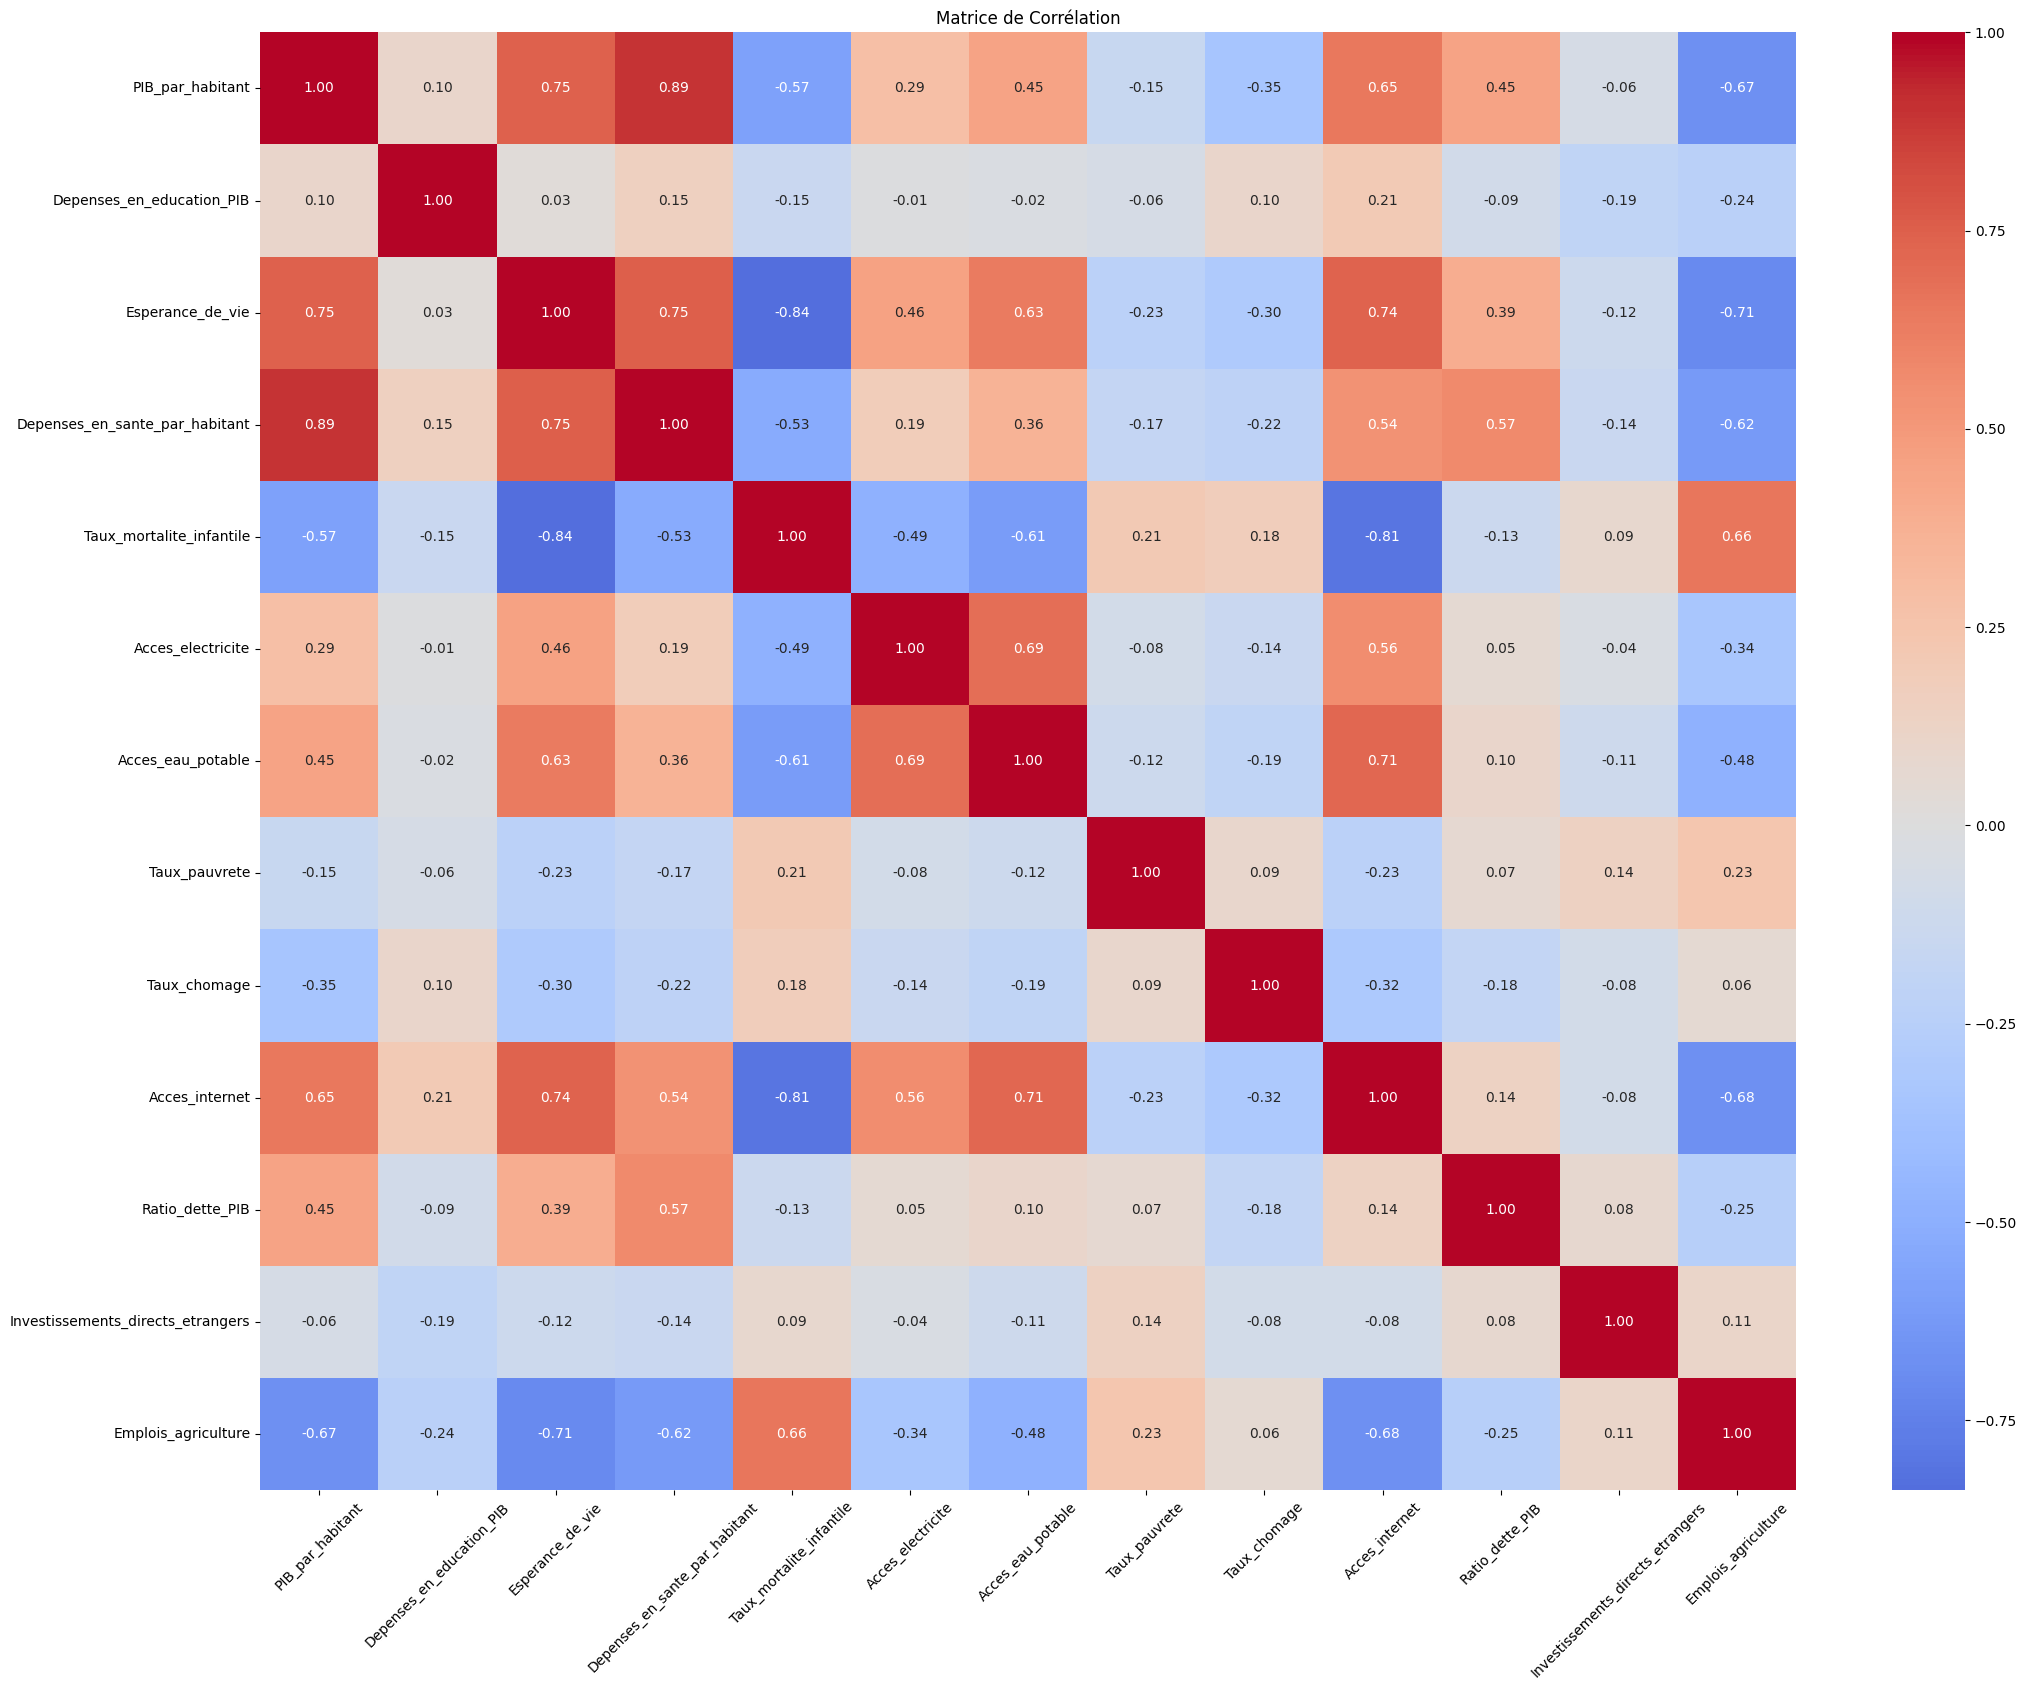

In [169]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(22, 17))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=colonnes_numeriques,  # Ajout des noms des variables sur l'axe x
            yticklabels=colonnes_numeriques)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

En observant la matrice, nous pouvons tirer plusieurs observations :

#### Corrélations fortement positives :

PIB par habitant et dépenses en santé (0.89) : Plus le PIB est élevé, plus les depenses en sante augmente.

---

#### Corrélations fortement négatives :

Espérance de vie et taux de mortalité infantile (-0.84) : Logiquement, ces deux indicateurs sont inversement corrélés.

Emplois agriculture et Espérance de vie (-0.71) : Plus la part d'emplois agricoles est importante, plus l'espérance de vie diminue.

Emplois agriculture et PIB par habitant (-0.67) : Les régions plus agricoles ont tendance à avoir un PIB plus faible.

---

#### Observations intéressantes :

L'accès à l'électricité montre peu de corrélations fortes avec les autres variables (valeurs proches de 0).

L'accès à internet est positivement corrélé avec le PIB (0.65).

Les dépenses en santé par habitant sont positivement corrélées avec l'espérance de vie (0.75).

---


#### Points d'attention :

Le taux de pauvreté montre des corrélations relativement faibles avec la plupart des variables.

Les investissements directs étrangers montrent peu de corrélations significatives avec les autres variables, suggérant qu'ils ne sont pas un indicateur fiable du niveau de développement dans les pays asiatiques.

---

Cette matrice permet de mettre en évidence les liens entre développement économique (PIB), indicateurs sociaux (espérance de vie, éducation) et structure économique (agriculture). Elle suggère qu'il existe un cercle vertueux entre richesse, santé et développement social, tandis que la prédominance de l'agriculture est associée à des indicateurs de développement plus faibles.

# ACP

**Question** : 
Quels sont les principaux indicateurs expliquant les variations des conditions socials et economiques des pays asiatique?

### 1. Extraction des valeurs propres

Les valeurs propres et vecteurs propres de la matrice de corrélation sont extraits pour déterminer les composantes principales.

In [170]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [5.54 1.56 1.38 1.   0.87 0.82 0.56 0.06 0.08 0.37 0.18 0.3  0.27]
Vecteurs propres :
 [[ 0.36 -0.28 -0.1  -0.02 -0.03  0.05  0.13  0.53  0.4  -0.51 -0.16  0.19
  -0.11]
 [ 0.06  0.2  -0.57  0.21 -0.5   0.38 -0.37  0.09  0.01  0.07  0.16  0.11
   0.07]
 [ 0.39 -0.06  0.02 -0.02  0.08 -0.08  0.16  0.44 -0.53  0.3   0.45  0.14
  -0.08]
 [ 0.34 -0.35 -0.23  0.02  0.08 -0.03  0.01 -0.66 -0.23 -0.28  0.09  0.36
  -0.07]
 [-0.36 -0.18 -0.03 -0.05  0.11  0.1  -0.29  0.21 -0.54 -0.55  0.03 -0.24
   0.17]
 [ 0.24  0.34  0.37  0.17  0.13  0.05 -0.52 -0.03 -0.03 -0.16  0.    0.
  -0.58]
 [ 0.31  0.28  0.29  0.12  0.18  0.04 -0.13 -0.06  0.17 -0.18  0.28  0.06
   0.73]
 [-0.11 -0.19  0.21  0.76  0.04  0.44  0.35 -0.03 -0.05 -0.    0.01 -0.05
  -0.05]
 [-0.14  0.21 -0.32  0.52  0.19 -0.66 -0.04  0.12 -0.05 -0.06 -0.15  0.21
   0.05]
 [ 0.37  0.19  0.07 -0.   -0.18  0.09  0.09  0.01 -0.4   0.06 -0.75 -0.05
   0.2 ]
 [ 0.16 -0.59 -0.    0.16  0.2  -0.05 -0.53  0.07  0.13  0.41 -0.17

### 2. Illustration des composantes principales

La variance expliquée par chaque composante est visualisée pour choisir le nombre optimal de composantes.

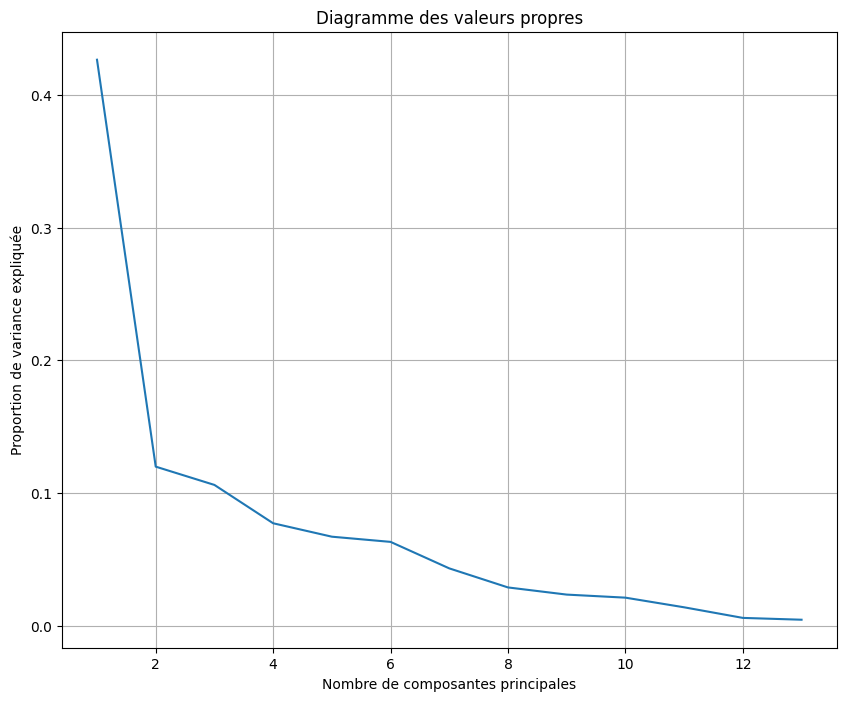

In [171]:
pca = PCA(n_components=len(colonnes_numeriques))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

 Ce graphe représente la proportion de variance expliquée par chaque composante principale.

La forme caractéristique en coude :

- Une forte pente au début (entre les composantes 1 et 2).
- Puis un aplatissement progressif de la courbe.

---

Interprétation des proportions :

- La première composante explique environ 40% de la variance totale.
- La deuxième composante explique environ 12-13%.
- Les composantes suivantes expliquent chacune moins de 10% de la variance.

---

Choix du nombre de composantes à retenir :

- Selon le critère du coude, on pourrait retenir 2 composantes.
- Ces 2 premières composantes expliqueraient environ 52-53% de la variance totale.

### 3. Application de l'ACP

#### 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [172]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### 2. Affichage des nouvelles données projetées sur les composantes principales.

In [173]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[-4.29778858  0.61566664]
 [-0.50531126 -1.09248374]
 [-1.00921572 -1.8108356 ]
 [ 2.56177452  0.84956734]
 [-1.63975936  0.28661473]
 [-0.50010562 -0.06134848]
 [ 1.7258097  -0.56098701]
 [-2.3364081   1.6035881 ]
 [ 0.82020818 -0.49508225]
 [ 3.37608131 -1.79015337]
 [-0.74200019 -0.59351951]
 [-2.67261175  1.15014925]
 [-1.57042798 -0.1670256 ]
 [ 0.2444026  -0.81768054]
 [-0.78265868 -1.05447495]
 [ 4.03050649  0.61542844]
 [ 4.89271574  4.27312067]
 [ 0.28738673 -1.35487379]
 [ 0.27315019 -1.78082957]
 [ 3.29497257 -0.39855586]
 [ 2.40265416 -0.39500866]
 [-0.43673933 -1.05447225]
 [-2.70100314  0.79371932]
 [ 0.51432532 -0.36108713]
 [ 1.02699051 -0.90369263]
 [ 1.47373094 -0.61934998]
 [-0.9324325   0.03549424]
 [-3.7754176   2.13543466]
 [-3.0820389  -0.54710731]
 [ 1.3917445  -0.49106192]
 [-3.51102927  1.05261524]
 [-0.93590026  0.14388079]
 [ 3.40009291  0.79704209]
 [ 2.04420324 -0.531374  ]
 [ 4.59640005  3.3145778 ]
 [-0.66690592  0.25541854

#### 3. Visualisation des données dans l'espace des deux premières composantes principales.

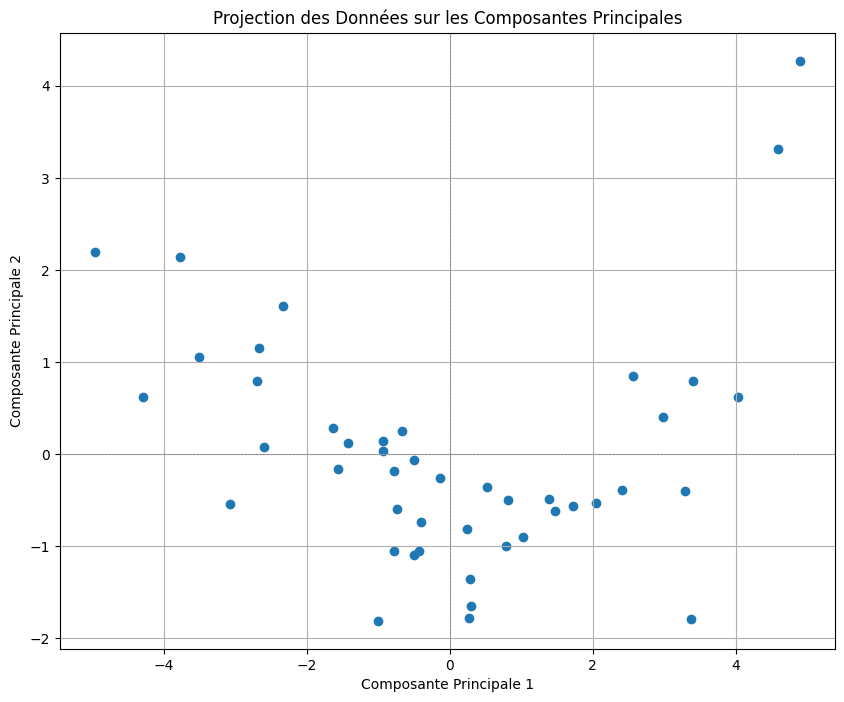

In [174]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

Ce graphique montre la projection des pays asiatiques sur les deux premières composantes principales (CP1 et CP2) issues de l'Analyse en Composantes Principales (ACP), basée sur des indicateurs provenant de l'API de la Banque Mondiale.

1. Distribution des pays :
- Les pays sont bien dispersés dans l'espace des composantes principales, suggérant une diversité dans les indicateurs analysés.
- Point isolé : Un pays se distingue fortement par ses valeurs sur les deux axes, ce qui pourrait refléter une particularité ou une anomalie.
- Concentration centrale : Plusieurs pays se regroupent autour de l'origine (0,0), suggérant des profils similaires pour ces indicateurs.

2. Interprétation des axes :

**Composante Principale 1 (CP1) :**

- Intervalle : de -4 à 4.
- Cette composante explique environ 40% de la variance totale et capte les différences majeures entre les pays asiatiques selon les indicateurs.
- Les pays avec des valeurs extrêmes sur cet axe présentent des caractéristiques significativement différentes (par exemple, économiques, sociales ou environnementales).

 **Composante Principale 2 (CP2) :**

- Intervalle : de -2 à 4.
- Cette composante explique environ 12-13% de la variance et reflète une seconde source de variation importante entre les pays, potentiellement liée à des aspects complémentaires des indicateurs.

3. Groupements et tendances :

- Groupes centraux : Un regroupement de pays autour de l'origine indique des profils proches pour les indicateurs choisis.
- Points isolés : Les pays éloignés de ce centre reflètent des cas particuliers ou des spécificités marquées.
- Dispersion : Une plus grande dispersion sur l’axe CP1 souligne son rôle clé dans la différenciation des pays.

### 4. Visualisation de la corrélation entre les variables d'origine et les nouvelles composantes

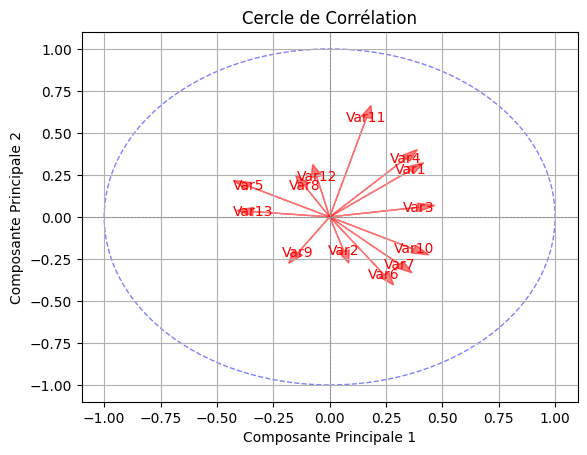

In [175]:
components = pca.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, f"Var{i+1}", color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

1. Composante Principale 1 représente le niveau de développement :
- Corrélations positives :
  * PIB par habitant
  * Espérance de vie
  * Accès à internet
  * Dépenses en santé par habitant
  * Accès à l'eau potable


- Corrélations négatives :
  * Emplois dans l'agriculture
  * Taux de mortalité infantile

2. Composante Principale 2 semble représenter les aspects financiers et économiques :
- Corrélations positives :
  * Ratio dette/PIB
  * Investissements directs étrangers

- Corrélations négatives:
  * Taux de chômage
  
3. Observations importantes :
- Les variables de développement humain (santé, éducation, espérance de vie) sont fortement corrélées entre elles
- L'emploi agricole s'oppose aux indicateurs de développement
- Certaines variables sont moins bien représentées car plus proches du centre du cercle (leurs vecteurs sont plus courts)

Cette visualisation confirme que :
1. La première composante capture principalement le niveau de développement global
2. La seconde composante reflète plutôt la structure économique et financière des pays

# AFD

**Question** : Les indicateurs permettent-ils de distinguer efficacement les pays selon leur niveau de developpement (Faible, Intermediaire, Eleve)?

### 1. Citer la variable cible 

In [176]:
# Variable cible
y = df['Niveau_de_developpement']  

# Appliquer l'AFD (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

### 2. Calculer le pourcentage de variance expliquée par chaque axe discriminant

In [177]:
explained_variance_ratio = lda.explained_variance_ratio_

# Affichage
print("Pourcentage de variance expliquée par chaque axe :")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Axe discriminant {i+1}: {ratio*100:.2f}%")

# Ou sous forme de DataFrame pour une meilleure visualisation
explained_variance_df = pd.DataFrame({'Axe discriminant': [f'Axe {i+1}' for i in range(len(explained_variance_ratio))],
                                      'Pourcentage de variance expliquée': explained_variance_ratio * 100})
print("\nPourcentage de variance expliquée (DataFrame) :\n", explained_variance_df)

Pourcentage de variance expliquée par chaque axe :
Axe discriminant 1: 86.63%
Axe discriminant 2: 13.37%

Pourcentage de variance expliquée (DataFrame) :
   Axe discriminant  Pourcentage de variance expliquée
0            Axe 1                          86.626178
1            Axe 2                          13.373822


### 3. Coefficients de la combinaison linéaire

In [178]:
print("Shape de X_lda :", X_lda.shape) # Affiche (n_observations, n_axes)

# Accès correct aux coefficients (seulement les 2 premiers axes)
coefficients = pd.DataFrame(lda.coef_, columns=colonnes_numeriques[:lda.coef_.shape[1]])
coefficients = coefficients.transpose()
coefficients.columns = [f'Axe discriminant {i+1}' for i in range(coefficients.shape[1])]
print("Coefficients des variables pour les axes discriminants :")
print(coefficients)

Shape de X_lda : (45, 2)
Coefficients des variables pour les axes discriminants :
                                   Axe discriminant 1  Axe discriminant 2  \
PIB_par_habitant                            -2.219232           -2.300086   
Depenses_en_education_PIB                   -0.021615           -0.608193   
Esperance_de_vie                            -0.103280           -0.378401   
Depenses_en_sante_par_habitant               0.168005            0.382325   
Taux_mortalite_infantile                     0.491220           -0.436853   
Acces_electricite                           -0.598122            0.299813   
Acces_eau_potable                            0.052005            0.270598   
Taux_pauvrete                                0.272411           -0.131566   
Taux_chomage                                 0.057784            0.275893   
Acces_internet                              -1.631507            0.302540   
Ratio_dette_PIB                              0.039899           -0.2073

Coefficients négatifs importants : PIB_par_habitant (-2.219), Acces_internet (-1.632), Acces_electricite (-0.598).

Coefficients positifs importants : Emplois_agriculture (0.830), Taux_mortalite_infantile (0.491).

---
Interprétation:

Extrémité gauche de AD1 (valeurs négatives) : Pays avec :

-PIB par habitant élevé.
-Accès à internet étendu.
-Accès à l'électricité généralisé.
-Faible taux de mortalité infantile.
-Faible proportion d'emplois dans l'agriculture.
Ces caractéristiques correspondent à des pays développés.

Extrémité droite de AD1 (valeurs positives) : Pays avec :

-PIB par habitant faible.
-Accès à internet limité.
-Accès à l'électricité restreint.
-Fort taux de mortalité infantile.
-Forte proportion d'emplois dans l'agriculture.
Ces caractéristiques correspondent à des pays moins développés.


Conclusion définitive sur AD1 :

AD1 représente bien un axe de développement, mais il est orienté de telle sorte que :

Les valeurs négatives sur AD1 correspondent à un niveau de développement élevé.
Les valeurs positives sur AD1 correspondent à un niveau de développement faible.

### 4. Visualisation de la distribution des données sur le premier axe discriminant

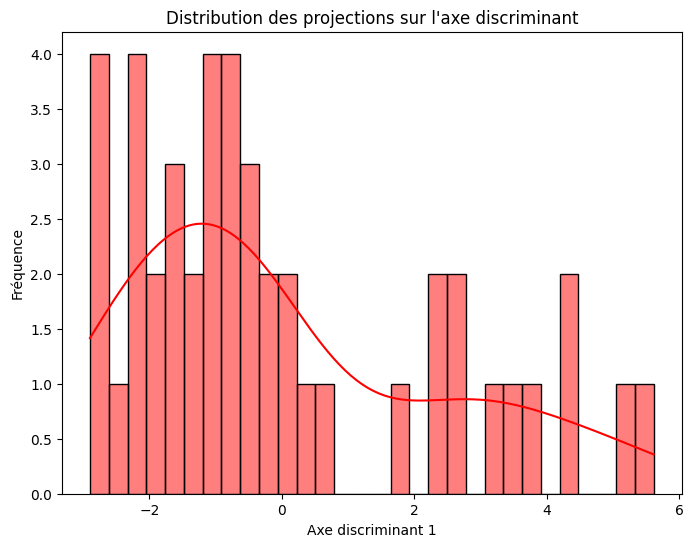

In [179]:
plt.figure(figsize=(8, 6))
sns.histplot(X_lda[:, 0], kde=True, color='red', bins=30)
plt.title("Distribution des projections sur l'axe discriminant")
plt.xlabel("Axe discriminant 1")
plt.ylabel("Fréquence")
plt.show()

**AD1 reflète le niveau de développement mais dans le sens inverse**, il est influencé par :

-Positivement : Emplois dans l'agriculture, taux de mortalité infantile, etc.

-Négativement : PIB par habitant, espérance de vie, accès à internet, dépenses en santé par habitant, accès à l'eau potable.

---

Un pays avec une valeur élevée positive sur AD1 serait moins développé (forte proportion d'emplois dans l'agriculture, taux de mortalité infantile élevé, etc.). Il se situera à droite sur le graphique des projections.

Un pays avec une valeur élevée négative sur AD1 serait très développé (fort PIB, haute espérance de vie, etc.). Il se situera à gauche sur le graphique des projections.

Un pays avec une valeur positive élevée sur AD1 est caractérisé par un niveau de développement faible. 
Un pays avec une valeur négative faible sur AD1 serait caractérisé par un fort niveau de développement.

En résumé :

Côté gauche de AD1 (valeurs négatives) : Pays développés.
Côté droit de AD1 (valeurs positives) : Pays moins développés.

### 5. L'importance des variables pour l'AD1

C:\Users\one\AppData\Local\Temp\ipykernel_15468\2263951810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients['Axe discriminant 1'], y=coefficients.index, palette='viridis')


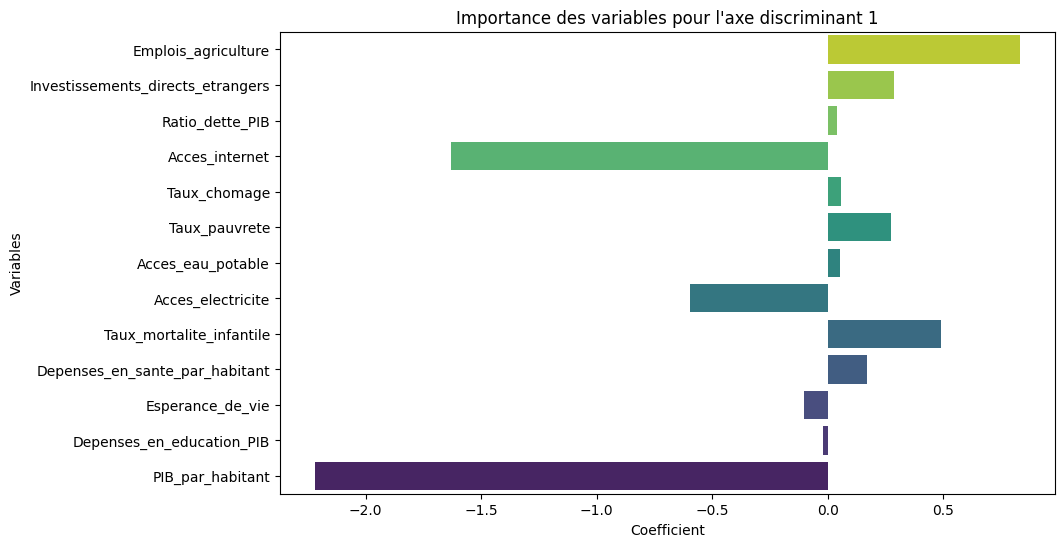

In [180]:
# Visualisation des coefficients avec des barres horizontales et variables en bas
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Axe discriminant 1'], y=coefficients.index, palette='viridis')
plt.title("Importance des variables pour l'axe discriminant 1")
plt.xlabel("Coefficient")
plt.ylabel("Variables")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que les variables les plus influentes soient en bas
plt.show()

Interpretation :

PIB_par_habitant : Cette variable a le coefficient négatif le plus important, ce qui indique qu'une augmentation du PIB par habitant est fortement associée à une diminution de la valeur sur l'axe discriminant.

Acces_internet : Cette variable a également un coefficient négatif important, ce qui suggère qu'un accès accru à Internet est associé à une diminution de la valeur sur l'axe discriminant.

Emplois_agriculture : Cette variable a le coefficient positif le plus important, ce qui indique qu'une augmentation de la proportion d'emplois dans l'agriculture est fortement associée à une augmentation de la valeur sur l'axe discriminant.

Taux_mortalite_infantile : Cette variable a également un coefficient positif, ce qui suggère qu'une augmentation du taux de mortalité infantile est associée à une augmentation de la valeur sur l'axe discriminant.

---

autrement dit:

Les variables associées au développement économique (PIB, accès à Internet) ont une forte influence négative sur l'axe discriminant. Cela signifie que les pays ayant des niveaux de développement plus élevés ont tendance à avoir des valeurs plus basses sur cet axe.

Les variables associées à des niveaux de développement inférieurs (emploi dans l'agriculture, mortalité infantile) ont une forte influence positive sur l'axe discriminant. Cela signifie que les pays ayant des niveaux de développement inférieurs ont tendance à avoir des valeurs plus élevées sur cet axe.

### 6. Évaluation de la performance :

In [181]:

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Appliquer l'AFD sur les données d'entraînement
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lda.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")

Précision du modèle : 0.6429


### 7. Matrice de confusion

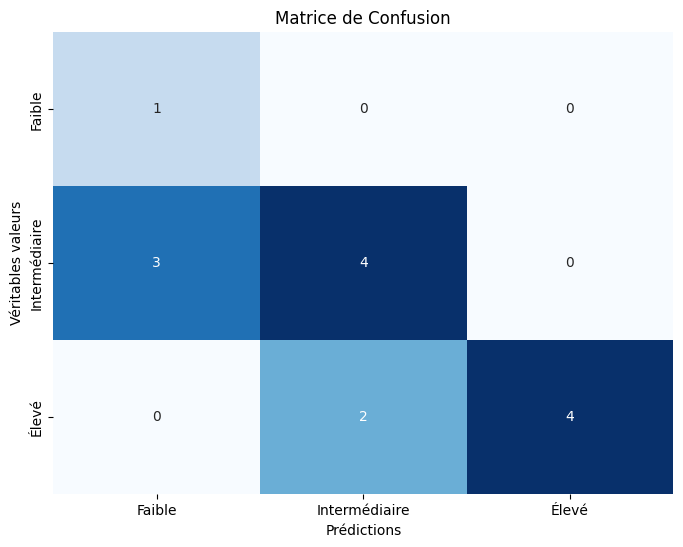

In [182]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Faible', 'Intermédiaire', 'Élevé'], yticklabels=['Faible', 'Intermédiaire', 'Élevé'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables valeurs")
plt.show()

Cette matrice évalue un modèle de classification en trois classes : "Faible", "Intermédiaire" et "Élevé".

Bons résultats : Le modèle prédit bien les classes "Faible" et "Élevé".

Difficultés : La classe "Intermédiaire" est plus difficile à prédire.

In [183]:
# Rapport de classification (précision, rappel, F1-score)
class_report = classification_report(y_test, y_pred)
print("Rapport de classification :")
print(class_report)

Rapport de classification :
               precision    recall  f1-score   support

       Faible       0.25      1.00      0.40         1
Intermédiaire       0.67      0.57      0.62         7
        Élevé       1.00      0.67      0.80         6

     accuracy                           0.64        14
    macro avg       0.64      0.75      0.61        14
 weighted avg       0.78      0.64      0.68        14



# CAH

### 1. Tracer le dendrogramme 

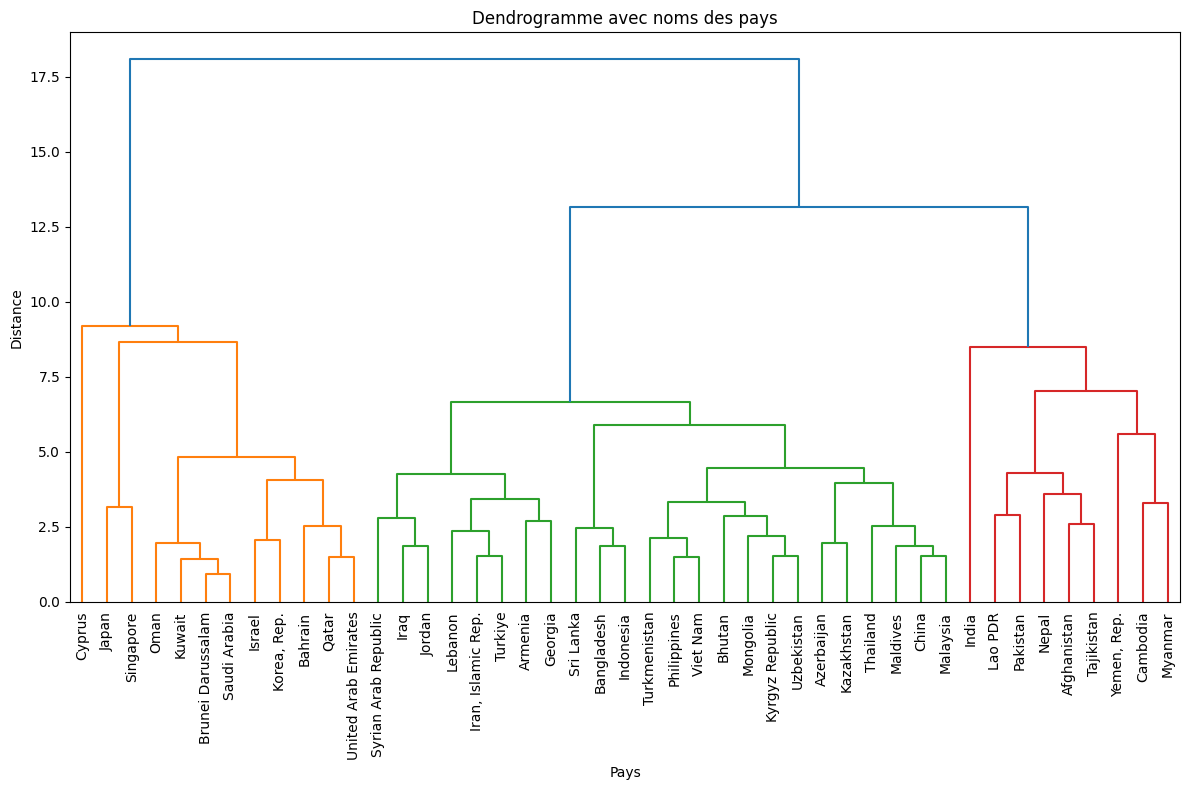

In [186]:
# Créer une matrice de linkage pour le dendrogramme
country_names = df['Country'] 
linkage_matrix = linkage(X_scaled, method='ward')

# Afficher le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=country_names.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme avec noms des pays")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [187]:
# Appliquer la classification ascendante hiérarchique
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(X_scaled)

# Ajouter les clusters aux données
df['Cluster'] = clusters